In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [3]:
bank_df = pd.read_csv(Path("../data/Cleaned_Modelling.csv"),header=0)
bank_df.drop(columns=["last_transaction"], inplace=True)
bank_df.drop(columns=["customer_id","gender","customer_nw_category","occupation"], inplace=True)

In [4]:
bank_df.columns

Index(['vintage', 'age', 'dependents', 'city', 'branch_code',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn', 'days_since_last_transaction'],
      dtype='object')

In [5]:
x =bank_df.drop(['churn'],axis = 1)
y = bank_df['churn']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)

In [7]:
# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier()

In [8]:
# Define stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
X_train,X_test, y_train,y_test =train_test_split(x,y,test_size = 0.2)

In [12]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.8498412960657395


In [13]:
# Fit the AdaBoost classifier with the best parameters
best_adaboost_clf = AdaBoostClassifier(**best_params)
best_adaboost_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_adaboost_clf.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8449405981155265


In [15]:
TP = sum((y_test == 1) & (y_pred == 1))
FN = sum((y_test == 1) & (y_pred == 0))

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.37552301255230125


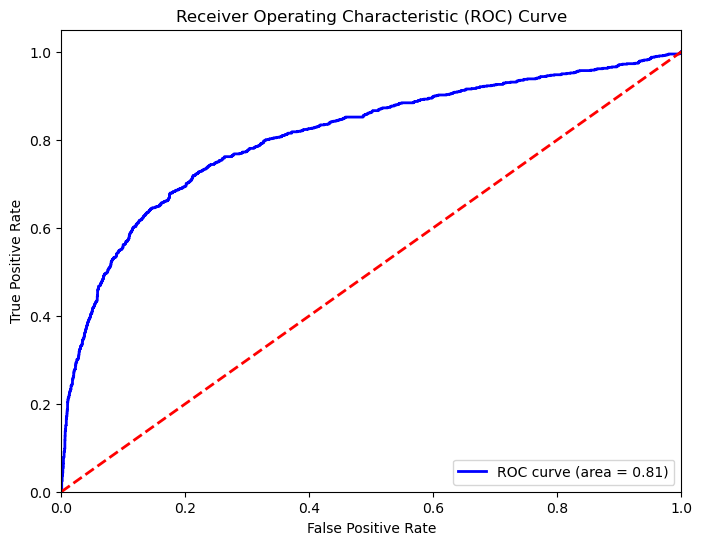

In [16]:
# Calculate the probability scores for the test set
y_score = best_adaboost_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
#Calcate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8090760395773697


In [18]:
# Feature importance
feature_importance = best_adaboost_clf.feature_importances_
important_features = pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)
print("Important Features:")
print(important_features)

Important Features:
current_balance                   0.160000
average_monthly_balance_prevQ     0.133333
vintage                           0.100000
average_monthly_balance_prevQ2    0.086667
branch_code                       0.066667
current_month_debit               0.066667
current_month_balance             0.060000
previous_month_balance            0.060000
city                              0.053333
age                               0.046667
previous_month_end_balance        0.046667
current_month_credit              0.046667
previous_month_credit             0.026667
previous_month_debit              0.026667
days_since_last_transaction       0.013333
dependents                        0.006667
dtype: float64


### With Feature Selection

In [19]:
select_features = list(important_features.index[0:10])
select_features.append("churn")
print(select_features)

['current_balance', 'average_monthly_balance_prevQ', 'vintage', 'average_monthly_balance_prevQ2', 'branch_code', 'current_month_debit', 'current_month_balance', 'previous_month_balance', 'city', 'age', 'churn']


In [ ]:
"""['average_monthly_balance_prevQ', 'current_balance', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'average_monthly_balance_prevQ2', 'previous_month_credit', 'current_month_credit', 'vintage', 'previous_month_end_balance', 'churn']"""
bank_df_select = bank_df[select_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_df_select.drop(columns=['churn']), bank_df_select['churn'], test_size=0.2, random_state=42)

In [ ]:
ada_clf = AdaBoostClassifier()

In [ ]:
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
# Fit the AdaBoost classifier with the best parameters
best_adaboost_clf = AdaBoostClassifier(**best_params)
best_adaboost_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_adaboost_clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
TP = sum((y_test == 1) & (y_pred == 1))
FN = sum((y_test == 1) & (y_pred == 0))

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

In [ ]:
# Calculate the probability scores for the test set
y_score = best_adaboost_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **Oversampling with Feature Selection**

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [21]:
ada_clf = AdaBoostClassifier()

In [22]:
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.8173243038045396


In [24]:
# Fit the AdaBoost classifier with the best parameters
best_adaboost_clf = AdaBoostClassifier(**best_params)
best_adaboost_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_adaboost_clf.predict(X_test)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7918885702580909


In [26]:
TP = sum((y_test == 1) & (y_pred == 1))
FN = sum((y_test == 1) & (y_pred == 0))

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

print("Sensitivity (True Positive Rate):", sensitivity)

Sensitivity (True Positive Rate): 0.600418410041841


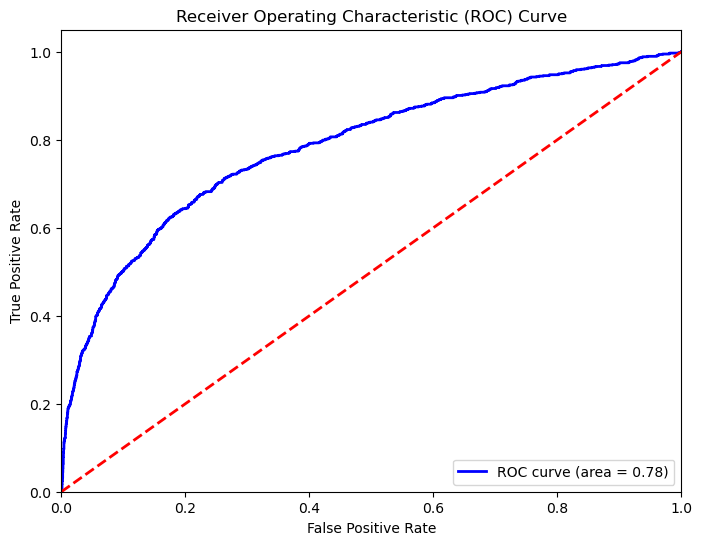

In [27]:
# Calculate the probability scores for the test set
y_score = best_adaboost_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()